This notebook is not yet complete. The TDA portion of the analysis was completed however, it's direct application to model building is incomplete. The following task is to extract the data which behaves different and then build a statistical model using the same method as Part A.

<h1><center>Prediction using Topological Data Analysis</center></h1>
<img src="https://geotg.com/wp-content/uploads/2017/11/data-analytics.png" width="70%">
<p style="text-align: center;">Image from: https://geotg.com/data-analytics/</p>

This notebook will demonstrate how TDA can be used to improve prediction. To do so, the notebook will first use basic statistical methods to build a model and then run a regression. Afterwards, the notebook will use on Mapper improve the accuracy of the model.

We will use the Boston House Price dataset because it is fairly familiar and easy to work with. Additionally, because this dataset has been used many times, the overall results of this analysis can be validated through other projects. The main purpose of this notebook is to simply demonstrate how TDA can be used to help develop a prediction model.

Why should we apply TDA to modeling? TDA has many uses in model building. For instancse, it can be used for feature selection, detecting patterns that are overwise unseen, or for data pre-processing.

The following video, thought long, is of an interesting lecture that discusses how we can build predictice models using TDA.

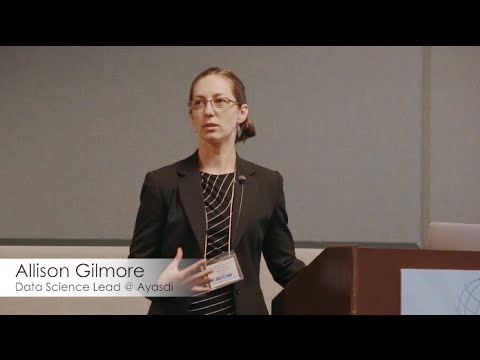

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("F2t_ytTLrQ4",width=640,height=360)

## Part A
#### Statistical Analysis
This section will use statistical tools to build a model. Although model building requries a lot of work, this notebook will use the very basics of model building. 

In [3]:
from Topological_ML import tda_function as tda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# Import data from scikit-learn
boston = load_boston(return_X_y=False)

# Convert dataset into pandas dataframe
df = tda.numpy_to_pandas(boston)

# Dimension of data
print('The Boston house-prices dataset dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')
df.head(10)

The Boston house-prices dataset dataset has 506 rows and 14 columns.


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
5     18.7  394.12   5.21    28.7  
6     15.2  395.60  12.43    22.9  
7     15.2  396.90  19.15    27.1  
8     15.2  386.63  29.93    16.5  
9     15.2  386.71  17.10    18.9

#### Exploratory Data Analysis

In [33]:
# Descriptive statistics of data
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

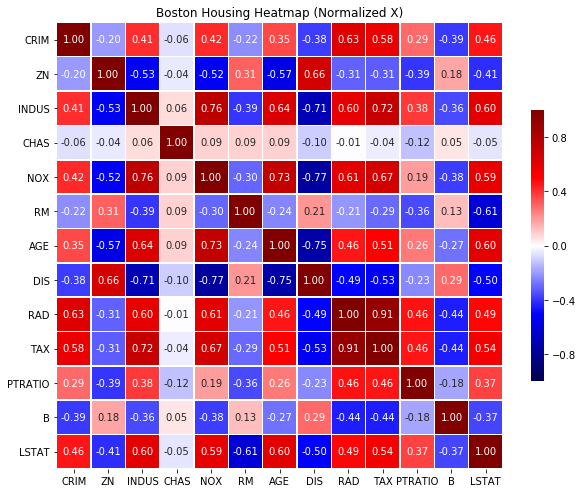

In [4]:
from sklearn import preprocessing

# standardize data
X = df.drop('target', axis=1)
y = df.target
normalized_X = preprocessing.normalize(X)

# correlation heatmap
plt.figure(figsize = (10,10))

sns.heatmap(X.corr(), annot = True, center=0, square = True, linewidths = .5,
            cbar_kws={"shrink": .5}, fmt = '.2f', cmap = 'seismic', vmin = -1, vmax=1)

plt.title('Boston Housing Heatmap (Normalized X)')

plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# split dataset into testnig and training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

print(lm.intercept_)

36.357041376595205


In [6]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

Attribute Coefficients
0       CRIM     -0.12257
1         ZN    0.0556777
2      INDUS  -0.00883428
3       CHAS      4.69345
4        NOX     -14.4358
5         RM      3.28008
6        AGE  -0.00344778
7        DIS     -1.55214
8        RAD      0.32625
9        TAX   -0.0140666
10   PTRATIO    -0.803275
11         B   0.00935369
12     LSTAT    -0.523478

In [7]:
from sklearn import metrics
# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


It is rather obvious that this model can be easily improved using different methods of feature selection, using a different model (i.e. something other than a linear model), look at different accuracy measures. However, the purpose of this notebook is to examine the TDA portion of model building. Hence, we will stick with this simple form. Hence, a standard statical model yields an $R^2$ of 0.74, meaning that 74% of variability in the response variable, _house price_, can be explained by the dependent variables.

## Part B
#### Topological Data Analysis
We now use TDA for prediction using MAPPER. 

Mapper can be thought of as a method of estimating and capturing this essential high dimensional structure (Singh, Memoli, and Carlsson 2007). It encodes information about relationships between regions of the data and the simplicial complex produced can be both aesthetically pleasing and useful for exploring such relationships.

The reason why we use Mapper when building a predictive model is because the dataset might have a complex strucutre that if better understood, we can create stronger models. 

In [14]:
# imports
import sys
try:
    import pandas as pd
except ImportError as e:
    print("pandas is required for this example. Please install with conda or pip  and then try again.")
    sys.exit()
import sklearn
from sklearn import ensemble
import kmapper as km
from kmapper.plotlyviz import *

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import boston house price dataset from scikit learn
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston['data'],columns = boston['feature_names'])
df['price'] = boston['target']

Different types of projections include: 
- sum
- mean
- median
- max
- min
- std
- dist_mean
- l2norm
- knn_distance_n

In [25]:
# seperate features and response
feature_names = [c for c in df.columns if c not in ["price"]]
x = np.array(df[feature_names])
y = np.array(df["price"])

# you may choose any lens type here
lens, mapper = tda.lens_1d(x,"min")

# Define the simplicial complex
scomplex = mapper.map(lens,
                      x,
                      nr_cubes=15,
                      overlap_perc=0.7,
                      clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                       random_state=3471))

One way to determine whether the output map is good is to look at the color of the nodes: if the nodes are seperated by color, that means you have attained good separability. If the colors are scattered, then it's important to either change the lens, filter function, clustering method, etc. In the following code, we will build an interactive graph with nodes colored based on the response variable, _house price_.

In [30]:
# This code is provided by scikit-tda. It is used to set up an interactive graph within jupyter.

# color scale
pl_brewer = [[0.0, '#006837'],
             [0.1, '#1a9850'],
             [0.2, '#66bd63'],
             [0.3, '#a6d96a'],
             [0.4, '#d9ef8b'],
             [0.5, '#ffffbf'],
             [0.6, '#fee08b'],
             [0.7, '#fdae61'],
             [0.8, '#f46d43'],
             [0.9, '#d73027'],
             [1.0, '#a50026']]

color_function = lens [:,0] - lens[:,0].min()

my_colorscale = pl_brewer

kmgraph,  mapper_summary, colorf_distribution = get_mapper_graph(scomplex,
                                                                 color_function,
                                                                 color_function_name='Distance to x-min',
                                                                 colorscale=my_colorscale)

# assign to node['custom_tooltips']  the node label: house price
for node in kmgraph['nodes']:
    node['custom_tooltips'] = y[scomplex['nodes'][node['name']]]

bgcolor = 'rgba(10,10,10, 0.9)'

# on a black background the gridlines are set on  grey
y_gridcolor = 'rgb(150,150,150)'

plotly_graph_data = plotly_graph(kmgraph, graph_layout='fr', colorscale=my_colorscale,
                                 factor_size=2.5, edge_linewidth=0.5)

layout = plot_layout(title='Topological network representing the<br>  boston house price dataset',
                     width=620, height=570,
                     annotation_text=get_kmgraph_meta(mapper_summary),
                     bgcolor=bgcolor)

fw_graph = go.FigureWidget(data=plotly_graph_data, layout=layout)

fw_hist = node_hist_fig(colorf_distribution, bgcolor=bgcolor,
                        y_gridcolor=y_gridcolor)

fw_summary = summary_fig(mapper_summary, height=300)

dashboard = hovering_widgets(kmgraph,
                             fw_graph,
                             ctooltips=True, # ctooltips = True, because we assigned a label to each
                                             #cluster member
                             bgcolor=bgcolor,
                             y_gridcolor=y_gridcolor,
                             member_textbox_width=600)

#Update the fw_graph colorbar, setting its title:
fw_graph.data[1].marker.colorbar.title = 'dist to<br>x-min'

# VBox([fw_graph, HBox([fw_summary, fw_hist])])
dashboard

    'data': [{'hoverinfo': 'none',
              'line': {'color'…

Based on the node coloring, we can conclude that we achieved good separability. This means that the clusters behave differently and hence, we should consider seperating the data and analyzing it seperatly. That is, we should build a regression model based on the sub datasets. Before doing so, we should examine different parameters to determine whether we achieve better seperability. 